In [384]:
!pip install scikit-learn

In [385]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [386]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])


In [387]:
iris['data'].shape

(150, 4)

In [388]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


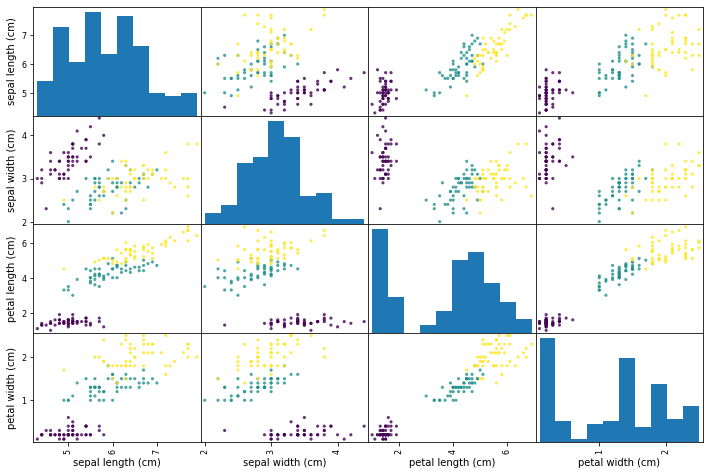

In [389]:
pd.plotting.scatter_matrix(df, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12, 8))
plt.show()

In [390]:
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [391]:
print(target_names)

['setosa' 'versicolor' 'virginica']


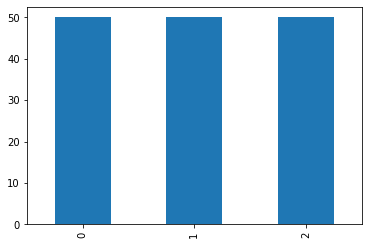

In [392]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

C:\Users\mye78\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


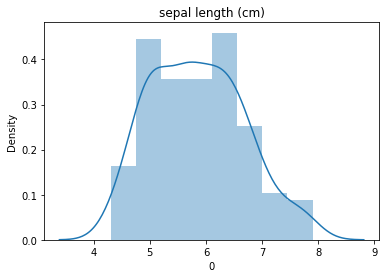

C:\Users\mye78\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


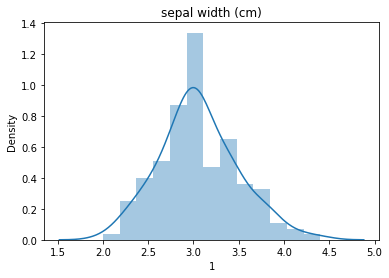

C:\Users\mye78\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


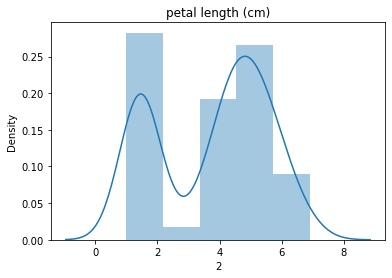

C:\Users\mye78\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


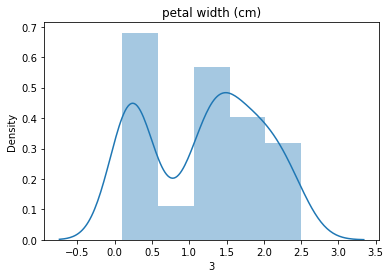

In [393]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [394]:
pca = PCA(n_components=2)
pca.fit(X)
PC_score = pca.transform(X)

print(PC_score[:5])
print(PC_score.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
(150, 2)


In [395]:
# pca 의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

# TODO 1

2차원 데이터가 주어졌을때 이를 scatter 하는 함수를 구현하시오.

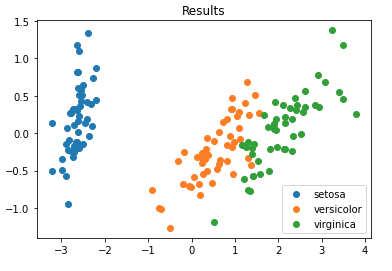

In [396]:
# 아래 그림은 정답 예시
Image("show2D_sample.png")

In [397]:
# Hint
# plt.legend(), plt.title(), plt.scatter() 함수 이용

def show2D(pca_score, Y, target_names):
    plt.figure()
    # TODO -->
    scatter = plt.scatter(pca_score[:, 0], pca_score[:, 1], c=Y)
    plt.legend(scatter.legend_elements()[0], target_names)
    plt.title('Results')
    # <--

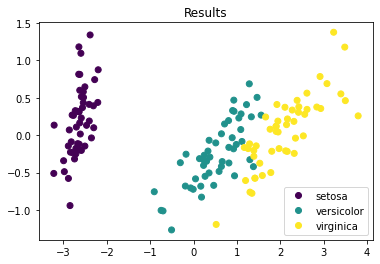

In [398]:
show2D(PC_score, Y, target_names)

In [399]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# TODO 2

PCA 함수를 구현하시오.

## 요구사항
1. normalize 한 것을 이용
2. 아래의 numpy 내장 함수 사용 가능
    - ```numpy.mean()```
    - ```numpy.linalg.eig()```
    - ```numpy.dot()```

In [400]:
def student_pca(X, n_components=2):
    pca_results = None
    # TODO -->
    cur_d = X.shape[1]
    fea_means = np.zeros(cur_d)
    for d in range(cur_d):
        fea_means[d] = X[:,d].mean()
    U = X-fea_means
    scatter = U.T@U
    cov_matrix = scatter/X.shape[0]
    eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
    s = eigen_val.argsort() # 내림차순
    V = eigen_vec.T[s[::-1][:n_components],:]
    # <--
    return X@V.T

pca_student_score = student_pca(X, n_components=2)

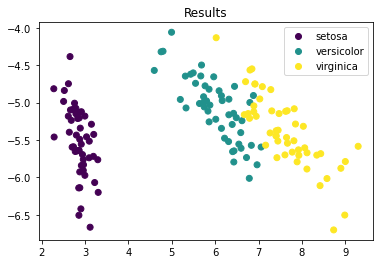

In [401]:
show2D(pca_student_score, Y, target_names)

# TODO 3

digits data 를 이용하여 PCA 결과를 확인하시오.

In [402]:
digits = datasets.load_digits()

In [403]:
df_digits = pd.DataFrame(digits['data'], columns=digits['feature_names'])
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [404]:
# TODO -->
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names

In [405]:
pca_digits = student_pca(X, n_components=2)

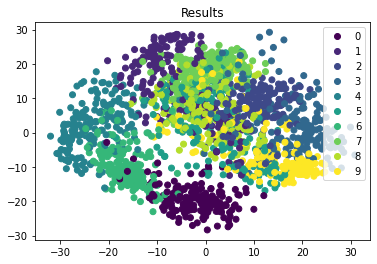

In [406]:
show2D(pca_digits, Y, target_names)
# <--

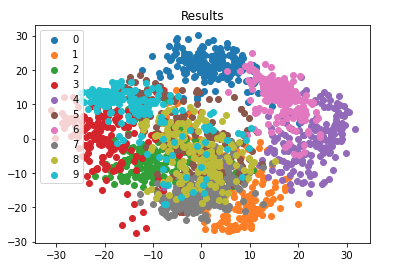

In [407]:
# 예시 정답
Image('digits_sample.png')

# TODO 4

TSNE 를 이용하여 digits 데이터의 결과를 Visualizing 하시오.

In [408]:
from sklearn.manifold import TSNE

In [409]:
tsne = TSNE(random_state=0)
digits_tsne = tsne.fit_transform(digits.data)

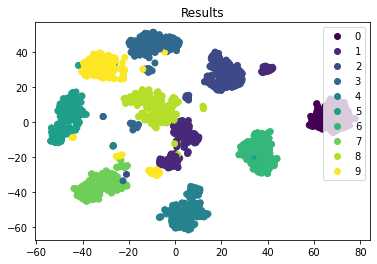

In [410]:
show2D(digits_tsne, Y, target_names)

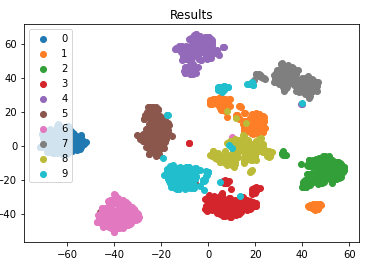

In [411]:
# 예시 정답
Image('tsne_sample.png')

# 과제 : PCA Reconstruction# 과제 : PCA reconstruction

Digits 데이터를 2차원, 3차원, 4차원, 32차원으로 PCA 한 결과를 reconstruction 했을 때 원래 데이터와의 MSE(Mean Square Error) 을 확인 및 복원데이터를 시각화하고 오차율이 다른 이유를 분석하여 보고서를 제출하시오. (코드, 분석내용 첨부)

- 제출형식: {분반}_{학번}_{이름}.zip (ex: 1_20210928_홍길동.zip)
- 제출파일: 보고서({분반}_{학번}_{이름}.pdf), 주피터노트북 파일({분반}_{학번}_{이름}.ipynb)
- 제출기한: 일주일 (사이버캠퍼스 참고)

In [412]:
digits = datasets.load_digits()

In [413]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))

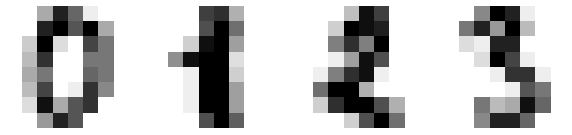

In [414]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

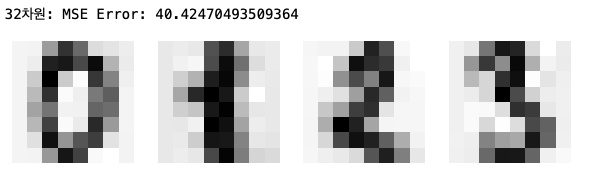

In [415]:
# 예시
Image('assignment_sample.png')

In [416]:
# TODO --> 
